# Classificação binária com dados não balanceados

### Bruno Oliveira


## 1. Objetivos
- Apresentar exemplo de pré-processamento de dados.

- Apresentar como classificar um conjunto de dados altamente desbalanceado no qual o número de exemplos de uma classe supera em muito os exemplos da outra.

- O conjunto de dados usados é o Detecção de fraude de cartão de crédito do Kaggle. O objetivo desses dados é detectar apenas 492 transações fraudulentas de um total de 284.807 transações.

- As tarefas realizadas para desenvolver a RNA para essa tarefa de classificação são as seguintes:
        
        Carregar um arquivo tipo CSV usando o Pandas;
        Criar conjuntos de treinamento, validação e teste;
        Definir e treinar um modelo com definição de pesos de classe;
        Avaliar o modelo usando várias métricas, incluindo precisão, revocação e F1;

## 2. Importação dos dados

In [22]:
import tensorflow as tf
from tensorflow import keras

import matplotlib as mpl                                      #gráficos complexos
import matplotlib.pyplot as plt                               #gráficos comuns

import numpy as np
import pandas as pd
import seaborn as sns                                         #visualização de dados

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split          #Divide dados de train, valid e test

In [23]:
# Definição de cores para gráficos
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## 3. Análise e processamento dos dados

## Carregar dados ("Credit Card Fraud dataset")

Para carregar dados de arquivos tipo CSV a melhor ferramenta é o Pandas. O Pandas possui muitas funções úteis para processar dados estruturados.

In [24]:
#Carrega base de dado do TensorFlow
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

In [25]:
# Mostra os 5 primeiros exemplos de dados
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Estatística básica de algumas colunas de características

In [26]:
#Inviável calcular estatísticas básicas de todas as colunas, seleciona somente algumas
raw_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V26,284807.0,1.701640e-15,0.482227,-2.604551,-0.326984,-0.052139,0.240952,3.517346
V27,284807.0,-3.662252e-16,0.403632,-22.565679,-0.070840,0.001342,0.091045,31.612198
V28,284807.0,-1.217809e-16,0.330083,-15.430084,-0.052960,0.011244,0.078280,33.847808
Amount,284807.0,8.834962e+01,250.120109,0.000000,5.600000,22.000000,77.165000,25691.160000


In [27]:
print('Dimensões dos dados =', raw_df.shape)

Dimensões dos dados = (284807, 31)


## Verificar o desbalanceamento dos dados

In [28]:
#bincount calcula a quantidade de zeros e uns de 'Classe' do dataframe
neg, pos = np.bincount(raw_df['Class'])
total = neg + pos

print('Examples:\n Total: {}\n Positive: {} ({:.2f}% of total)\n'.format(
total, pos, 100 * pos / total))

Examples:
 Total: 284807
 Positive: 492 (0.17% of total)



#### Esse resultado mostra a pequena fração dos dados da classe positiva (dados fraudulentos).

## Limpeza inicial dos dados

Esses dados apresentam alguns problemas. Primeiro, as colunas Time e Amount apresentam grandes variações para serem usadas diretamente. Assim, vamos elimine a coluna Time (uma vez que não está claro o que significa) e vamos calcular o logaritmo da coluna Amount para reduzir seu intervalo de variação.

In [29]:
#Copia dataframe para variável cleaned_df
cleaned_df = raw_df.copy()

# Eliminação da coluna Time
cleaned_df.pop('Time')

# Cálculo do log da coluna Amount
eps=0.001 # deve-se somar um número pequeno para evitar calcular log de zero
cleaned_df['LogAmmout'] = np.log(cleaned_df.pop('Amount')+eps)
cleaned_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,LogAmmout
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008105
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989913
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936641
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816249
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248367


## Divisão do conjunto de dados

Vamos dividir o conjunto de dados em conjuntos de treinamento, validação e teste. O conjunto de validação é usado durante o ajuste do modelo para avaliar a função de custo e outras métricas, no entanto, o modelo não se ajusta a esses dados. 
O conjunto de teste não é usado durante a fase de treinamento e só é usado no final para avaliar quão bem o modelo generaliza para novos dados. Isso é especialmente importante com conjuntos de dados desequilibrados, onde o sobreajuste é uma preocupação significativa devido à falta de dados de treinamento.

In [30]:
# Usaremos a função split da biblioteca sklearn para divir os dados. Dados de teste com 30%
train_df, test_df = train_test_split(cleaned_df, test_size=0.3)
test_df, val_df = train_test_split(test_df, test_size=0.5)

# Separa as saídas dos dados de entrada e as transforma em tensores Numpy
train_labels = np.array(train_df.pop('Class'))
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

# Transforma os dados de entrada em tensores Numpy
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [31]:
print(train_features.shape, test_features.shape, val_features.shape)
print(train_labels.shape, test_labels.shape, val_labels.shape)

(199364, 29) (42721, 29) (42722, 29)
(199364,) (42721,) (42722,)


## Normalização dos dados de entrada

Os dados de entrada serão normalizados para que cada característica (coluna) tenha média zero e desvio padrão igual a um.

As médias e desvios padrões de cada característica são calculados usando somente o conjunto de dados de treinamento e esses valores são usados para normalizar também os dados de validação e teste. Isso deve ser feito porque nenhuma informação dos dados de validação e teste devem ser utilizados no treinamento.

In [32]:
# Calcula média e desvio padrão de cada coluna dos dados de treinamento
mean = np.mean(train_features, axis=0)
std = np.std(train_features, axis=0)

# Normaliza dados de treinamento, validação e teste usando média e desvio padrão dos dados de treinamento
train_features = (train_features - mean)/std
val_features = (val_features - mean)/std
test_features = (test_features - mean)/std

print('Dimensão das saídas de treinamento:', train_labels.shape)
print('Dimensão das saídas de validação:', val_labels.shape)
print('Dimensão das saídas de teste:', test_labels.shape)
print('Dimensão das entradas de treinamento:', train_features.shape)
print('Dimensão das entradas de validação:', val_features.shape)
print('Dimensão das entradas de teste:', test_features.shape)

Dimensão das saídas de treinamento: (199364,)
Dimensão das saídas de validação: (42722,)
Dimensão das saídas de teste: (42721,)
Dimensão das entradas de treinamento: (199364, 29)
Dimensão das entradas de validação: (42722, 29)
Dimensão das entradas de teste: (42721, 29)


## Distribuição dos dados normalizados

Vamos comparar as distribuições dos exemplos das classes positivo e negativo usando algumas características.
As perguntas que se deve fazer neste momento são:

- Essas distribuições fazem sentido?
    
    Sim. As entradas foram normalizadas e, portanto, os dados estão concentrados principalmente no intervalo +/- 2 .
 
 
- Pode-se ver a diferença entre as distribuições?
    
    Sim, os exemplos positivos contêm uma taxa muito maior de valores extremos.   

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


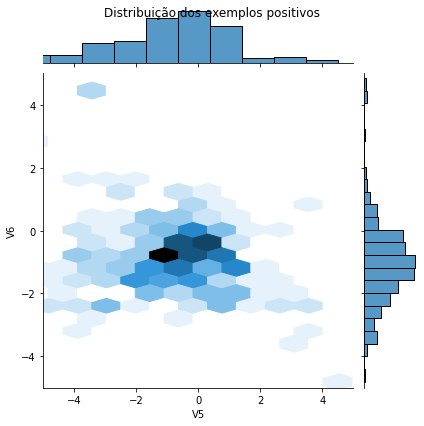

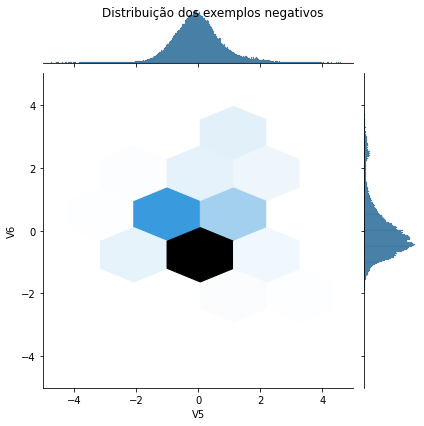

In [33]:
# Identifica exemplos positivos
bool_train_labels = train_labels != 0

# Separa exemplos positivos e negativos
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns = train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns = train_df.columns)

# Gráfico das colunas V5 e V6 dos exemplos positivos
sns.jointplot(pos_df['V5'], pos_df['V6'], kind='hex', xlim = (-5,5), ylim = (-5,5))
plt.suptitle("Distribuição dos exemplos positivos")

# Gráfico das colunas V5 e V6 dos exemplos negativos
sns.jointplot(neg_df['V5'], neg_df['V6'], kind='hex', xlim = (-5,5), ylim = (-5,5))
_ = plt.suptitle("Distribuição dos exemplos negativos")

## 4. Definição da RNA e das métricas

Vamos definir uma função que cria uma rede neural simples com uma camada oculta tipo densa e uma camada de saída com um único neurônio com função de ativação sigmóide, que retorna a probabilidade de uma transação ser fraudulenta.

In [34]:
# Importar do Keras classes de modelos e camadas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define métricas
METRICS = [
keras.metrics.TruePositives(name='tp'),
keras.metrics.FalsePositives(name='fp'),
keras.metrics.TrueNegatives(name='tn'),
keras.metrics.FalseNegatives(name='fn'),
keras.metrics.BinaryAccuracy(name='accuracy'),
keras.metrics.Precision(name='precision'),
keras.metrics.Recall(name='recall'),
keras.metrics.AUC(name='auc')]

# Função que cria e compila a RN
def make_model(METRICS, INPUT_DIM):
    # Configuração da rede
    rna = Sequential()
    rna.add(Dense(units=32, activation='relu', input_dim=INPUT_DIM))
    rna.add(Dense(units=1, activation='sigmoid'))
    
    rna.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=METRICS)

    return rna

In [35]:
# Determina número de carateríticas
features_shape = train_features.shape[1]                         #2° eixo dos dados de treinamento. 29 características
print('Dimensão dos dados de entrada =', features_shape)

# Cria RN já compilada
rna = make_model(METRICS, features_shape)
rna.summary()

Dimensão dos dados de entrada = 29
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                960       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


## Métricas

- **Falsos negativos** e **Falsos positivos** são exemplos classificados incorretamente.



- **Verdadeiros negativos** e **Verdadeiros positivos** são exemplos classificados corretamente.



- **Exatidão ("accuracy")** é a porcentagem de exemplos classificados corretamente:

                           exemplos classificados corretamente/total de exemplos


- **Precisão ("precision")** é a porcentagem de exemplos positivos classificados corretamente:
                    
                        verdadeiros positivos/verdadeiros positivos + falsos positivos
                        
- **Revocação ("recall")** é a porcentagem de exemplos positivos reais que foram classificados corretamente:

                        verdadeiros positivos/verdadeiros positivos + falsos negativos
                        
- **AUC** refere-se à área sob uma curva de característica de operação do receptor **(ROC-AUC)**. Essa métrica é igual à probabilidade de que um classificador classifique uma amostra positiva mais alta do que uma amostra negativa **ROC-AUC**


**Observação:** a exatidão não é uma métrica útil para essa tarefa. Você pode ter uma precisão de 99,8% nesta tarefa prevendo Falso o tempo todo.

## 5. Resultado base

## Treinamento da RN

Agora vamos treinar a RNA que foi definida anteriormente. Observe que o tamanho do lote de 2048 é bem maior do que o padrão de 32. Nesse tipo de problema isso é importante para garantir que cada lote tenha uma alguma chance de conter algumas amostras positivas. Se o tamanho do lote for muito pequeno, eles provavelmente não teriam transações fraudulentas com as quais aprender.

**Observação:** essa RNA não conseguirá lidar bem com o desequilíbrio de classe. Posteriormente vamos melhorar
esse resultado usando pesos para as classes.

In [36]:
EPOCHS = 100
BATCH_SIZE = 2048

# Define callback para parada
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',                                 #Variável a ser manipulada
    verbose=1,                                         #Mostrar na tela (Verbose=1) | Não mostrar (Verbose=0)
    patience=10,                                       #Número de épocas sem melhora
    mode='max',
restore_best_weights=True)                             #Retorna o resultado da melhor época

# Treinamento da RN
history = rna.fit(train_features, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE,
validation_data=(val_features, val_labels), verbose=1, callbacks=[early_stopping])

Epoch 1/100
98/98 [==============================] - 3s 30ms/step - loss: 0.4638 - tp: 196.0000 - fp: 33232.0000 - tn: 165809.0000 - fn: 127.0000 - accuracy: 0.8327 - precision: 0.0059 - recall: 0.6068 - auc: 0.7207 - val_loss: 0.2044 - val_tp: 27.0000 - val_fp: 49.0000 - val_tn: 42589.0000 - val_fn: 57.0000 - val_accuracy: 0.9975 - val_precision: 0.3553 - val_recall: 0.3214 - val_auc: 0.6375
Epoch 2/100
98/98 [==============================] - 1s 13ms/step - loss: 0.1287 - tp: 102.0000 - fp: 61.0000 - tn: 198980.0000 - fn: 221.0000 - accuracy: 0.9986 - precision: 0.6258 - recall: 0.3158 - auc: 0.7160 - val_loss: 0.0792 - val_tp: 30.0000 - val_fp: 4.0000 - val_tn: 42634.0000 - val_fn: 54.0000 - val_accuracy: 0.9986 - val_precision: 0.8824 - val_recall: 0.3571 - val_auc: 0.7362
Epoch 3/100
98/98 [==============================] - 1s 13ms/step - loss: 0.0568 - tp: 129.0000 - fp: 39.0000 - tn: 199002.0000 - fn: 194.0000 - accuracy: 0.9988 - precision: 0.7679 - recall: 0.3994 - auc: 0.8098

Epoch 22/100
98/98 [==============================] - 1s 13ms/step - loss: 0.0031 - tp: 236.0000 - fp: 32.0000 - tn: 199009.0000 - fn: 87.0000 - accuracy: 0.9994 - precision: 0.8806 - recall: 0.7307 - auc: 0.9476 - val_loss: 0.0048 - val_tp: 48.0000 - val_fp: 4.0000 - val_tn: 42634.0000 - val_fn: 36.0000 - val_accuracy: 0.9991 - val_precision: 0.9231 - val_recall: 0.5714 - val_auc: 0.9029
Epoch 23/100
98/98 [==============================] - 1s 13ms/step - loss: 0.0030 - tp: 239.0000 - fp: 28.0000 - tn: 199013.0000 - fn: 84.0000 - accuracy: 0.9994 - precision: 0.8951 - recall: 0.7399 - auc: 0.9476 - val_loss: 0.0047 - val_tp: 48.0000 - val_fp: 4.0000 - val_tn: 42634.0000 - val_fn: 36.0000 - val_accuracy: 0.9991 - val_precision: 0.9231 - val_recall: 0.5714 - val_auc: 0.9031
Epoch 24/100
98/98 [==============================] - 1s 13ms/step - loss: 0.0030 - tp: 237.0000 - fp: 26.0000 - tn: 199015.0000 - fn: 86.0000 - accuracy: 0.9994 - precision: 0.9011 - recall: 0.7337 - auc: 0.9478 - v

Epoch 43/100
98/98 [==============================] - 1s 12ms/step - loss: 0.0023 - tp: 246.0000 - fp: 19.0000 - tn: 199022.0000 - fn: 77.0000 - accuracy: 0.9995 - precision: 0.9283 - recall: 0.7616 - auc: 0.9561 - val_loss: 0.0040 - val_tp: 54.0000 - val_fp: 6.0000 - val_tn: 42632.0000 - val_fn: 30.0000 - val_accuracy: 0.9992 - val_precision: 0.9000 - val_recall: 0.6429 - val_auc: 0.9278
Epoch 44/100
98/98 [==============================] - 1s 13ms/step - loss: 0.0023 - tp: 245.0000 - fp: 19.0000 - tn: 199022.0000 - fn: 78.0000 - accuracy: 0.9995 - precision: 0.9280 - recall: 0.7585 - auc: 0.9561 - val_loss: 0.0040 - val_tp: 54.0000 - val_fp: 6.0000 - val_tn: 42632.0000 - val_fn: 30.0000 - val_accuracy: 0.9992 - val_precision: 0.9000 - val_recall: 0.6429 - val_auc: 0.9278
Epoch 45/100
98/98 [==============================] - 1s 12ms/step - loss: 0.0022 - tp: 246.0000 - fp: 19.0000 - tn: 199022.0000 - fn: 77.0000 - accuracy: 0.9995 - precision: 0.9283 - recall: 0.7616 - auc: 0.9546 - v

Epoch 64/100
98/98 [==============================] - 1s 13ms/step - loss: 0.0019 - tp: 256.0000 - fp: 15.0000 - tn: 199026.0000 - fn: 67.0000 - accuracy: 0.9996 - precision: 0.9446 - recall: 0.7926 - auc: 0.9624 - val_loss: 0.0038 - val_tp: 56.0000 - val_fp: 6.0000 - val_tn: 42632.0000 - val_fn: 28.0000 - val_accuracy: 0.9992 - val_precision: 0.9032 - val_recall: 0.6667 - val_auc: 0.9281
Epoch 65/100
98/98 [==============================] - 1s 13ms/step - loss: 0.0019 - tp: 256.0000 - fp: 19.0000 - tn: 199022.0000 - fn: 67.0000 - accuracy: 0.9996 - precision: 0.9309 - recall: 0.7926 - auc: 0.9640 - val_loss: 0.0039 - val_tp: 54.0000 - val_fp: 6.0000 - val_tn: 42632.0000 - val_fn: 30.0000 - val_accuracy: 0.9992 - val_precision: 0.9000 - val_recall: 0.6429 - val_auc: 0.9281
Epoch 66/100
98/98 [==============================] - 1s 13ms/step - loss: 0.0019 - tp: 256.0000 - fp: 16.0000 - tn: 199025.0000 - fn: 67.0000 - accuracy: 0.9996 - precision: 0.9412 - recall: 0.7926 - auc: 0.9640 - v

## Teste da RNA com os exemplos de teste



In [37]:
rna.predict(test_features[:10])

array([[8.5357160e-06],
       [3.9982796e-04],
       [5.2925944e-04],
       [2.4044514e-04],
       [1.4732974e-05],
       [2.6261806e-04],
       [4.2017932e-06],
       [1.5985523e-05],
       [3.4131957e-05],
       [3.1759067e-05]], dtype=float32)

## Análise dos resultados

Vamos fazer os gráficos da função de custo e de algumas métricas dos resultados dos conjuntos de treinamento e validação. Eles são úteis para verificar se há "overfitting". 


In [38]:
# Define função para fazer graficos de algumas métricas
def plot_metrics(history):
    metrics = ['loss', 'auc', 'precision', 'recall']
    plt.figure(figsize=(12,8))

    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')

        plt.plot(history.epoch, history.history['val_'+metric],
        color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])
            plt.legend()

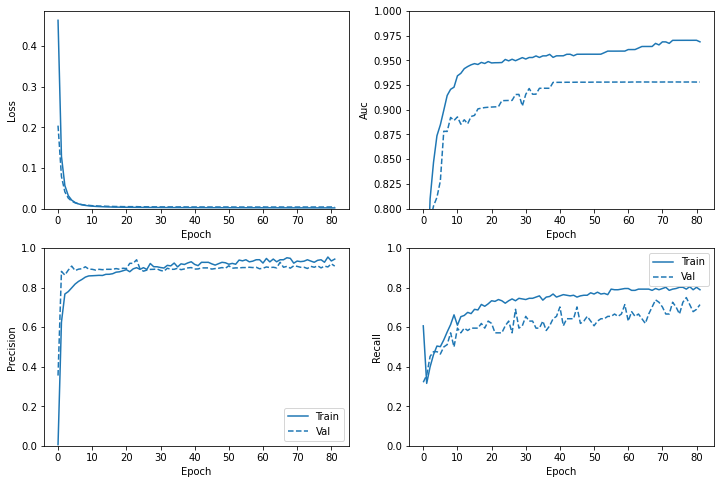

In [39]:
plot_metrics(history)

## Avaliação dos resultados

Vamos avaliar a RN com o conjunto de dados de teste e obter os resultados para as métricas que foram utilizadas.

In [40]:
print('Número de exemplos positivos do conjunto de teste =', len(test_labels[test_labels>0.9]))

Número de exemplos positivos do conjunto de teste = 85


In [41]:
base_results = rna.evaluate(test_features, test_labels,
batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(rna.metrics_names, base_results):
    print(name, ': ', value)
print()

loss :  0.003901805030182004
tp :  61.0
fp :  1.0
tn :  42635.0
fn :  24.0
accuracy :  0.9994148015975952
precision :  0.9838709831237793
recall :  0.7176470756530762
auc :  0.9170202612876892



## Cálculo da Pontuação F1

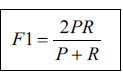

In [42]:
precision = base_results[5]                         #Precisão é o sexto elemento das métricas
recall = base_results[6]                            #Precisão é o sétimo elemento das métricas
F1 = 2*precision*recall/(precision + recall)
print('Pontuação F1 = ', F1)

Pontuação F1 =  0.9915819807425513


## Matriz de confusão

Podemos usar uma matriz de confusão para resumir as classes reais e previstas, onde o eixo horizontal é a
classe prevista e o eixo vertical é a classe real.

In [43]:
train_pred_base = rna.predict(train_features, batch_size=BATCH_SIZE)
test_pred_base = rna.predict(test_features, batch_size=BATCH_SIZE)
print('Saídas de alguns exemplos de teste:')
print(test_pred_base[:10])

Saídas de alguns exemplos de teste:
[[8.5357160e-06]
 [3.9982796e-04]
 [5.2925944e-04]
 [2.4044514e-04]
 [1.4732974e-05]
 [2.6261806e-04]
 [4.2017932e-06]
 [1.5985523e-05]
 [3.4131957e-05]
 [3.1759067e-05]]


Matriz de confusão:
 [[42635     1]
 [   24    61]]


<ipython-input-44-3184717bfa2a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-44-3184717bfa2a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


<Figure size 432x432 with 0 Axes>

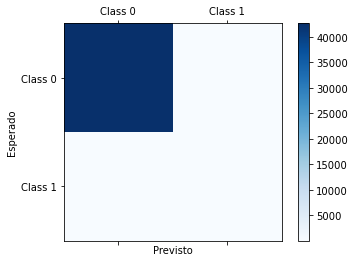

In [44]:
conf_mat = confusion_matrix(y_true=test_labels, y_pred=np.round(test_pred_base))
print('Matriz de confusão:\n', conf_mat)

labels = ['Class 0', 'Class 1']
plt.figure(figsize=(6,6))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Previsto')
plt.ylabel('Esperado')
plt.show()

**Se o modelo tivesse previsto tudo perfeitamente, a matriz de confusão seria uma matriz diagonal com os valores fora da diagonal principal, indicando as previsões incorretas, iguais a zero. Nesse caso, a matriz mostra que se tem relativamente poucos falsos positivos, o que significa que havia relativamente poucas transações legítimas que foram sinalizadas incorretamente. No entanto, seria desejado ter menos falsos negativos, apesar do custo de aumentar o número de falsos positivos. Essa troca pode ser preferível porque os falsos negativos permitiriam a realização de transações fraudulentas, ao passo que os falsos positivos podem fazer com que um e-mail seja enviado a um cliente solicitando a verificação da atividade do cartão.**

## Gráfico ROC

Agora vamos fazer o gráfico do ROC. Este gráfico é útil porque mostra como varia o desempenho da RN em função do valor do limiar para considerar as classes dos exemplos.

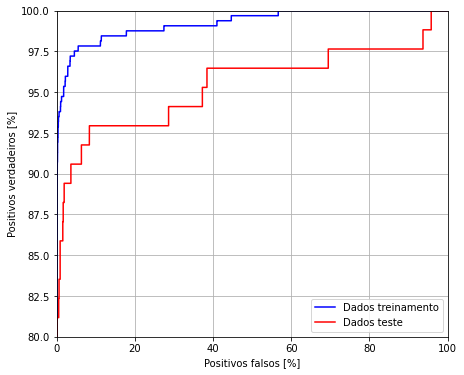

In [45]:
fp_train, tp_train, _ = sklearn.metrics.roc_curve(train_labels, train_pred_base)
fp_test, tp_test, _ = sklearn.metrics.roc_curve(test_labels, test_pred_base)
plt.figure(figsize=(7, 6))
plt.plot(100*fp_train, 100*tp_train, 'b', label='Dados treinamento')
plt.plot(100*fp_test, 100*tp_test, 'r', label='Dados teste')
plt.xlabel('Positivos falsos [%]')
plt.ylabel('Positivos verdadeiros [%]')
plt.xlim([0,100])
plt.ylim([80,100])
plt.grid(True)
ax = plt.gca()
plt.legend(loc='lower right')
plt.show()

**Observa-se que a precisão é relativamente alta, mas a revocação e a área sob a curva ROC (AUC) não são tão altas quanto se desejaria. Os classificadores geralmente enfrentam desafios ao tentar maximizar a precisão e a revocação, o que é especialmente verdadeiro quando se trabalha com conjuntos de dados desbalanceados.**

**É importante considerar os custos dos diferentes tipos de erros no contexto do problema. Neste exemplo, um falso negativo (uma transação fraudulenta é perdida) pode ter um custo financeiro, enquanto um falso positivo (uma transação é sinalizada incorretamente como fraudulenta) pode prejudicar o relacionamento com o cliente.**

## 6. Treinamento com pesos para cada classe

## Calculo dos pesos das classes

O objetivo é identificar transações fraudulentas, mas não se tem muitas desses exemplos positivos para
trabalhar, então, uma solução é o classificador dar um peso maior para os poucos exemplos dessa classe que
estão disponíveis. Pode-se fazer isso passando pesos para cada classe por meio de um parâmetro. Isso faz com
que o modelo "preste mais atenção" aos exemplos de uma classe sub-representada.

In [46]:
# Cálculo dos pesos das duas classe
weight_for_0 = (1 / neg)*(total)/2.0
weight_for_1 = (1 / pos)*(total)/2.0

# Dicionário de pesos das classes para treinamento
class_weight = {0: weight_for_0, 1: weight_for_1}
print('Peso da classe 0: {:.2f}'.format(weight_for_0))
print('Peso da classe 1: {:.2f}'.format(weight_for_1))

Peso da classe 0: 0.50
Peso da classe 1: 289.44


## Treinamento da RNA com pesos de classe
Vamos treinar novamente a RN com pesos diferentes para cada classe e avaliar como isso afeta as previsões.

**Importante:**
- Usar class_weights muda o valor da função de custo. Isso pode afetar a estabilidade do treinamento dependendo do otimizador. Alguns otimizadores, tal como, momento e RMSProp podem falhar.

- O otimizador usado é Adam, que é pouco afetado pela mudança de escala da função de custo.

- Observe que devido à ponderação, as perdas totais não são comparáveis entre os dois modelos.


In [47]:
rna_pond = make_model(METRICS, features_shape)
pond_history = rna_pond.fit(train_features, train_labels, batch_size=BATCH_SIZE,
epochs=60,
#callbacks = [early_stopping],
validation_data=(val_features, val_labels),
# Pesos das classes
class_weight=class_weight)

Epoch 1/60
98/98 [==============================] - 3s 32ms/step - loss: 0.6580 - tp: 304.0000 - fp: 87758.0000 - tn: 153919.0000 - fn: 104.0000 - accuracy: 0.6371 - precision: 0.0035 - recall: 0.7451 - auc: 0.7847 - val_loss: 0.5393 - val_tp: 73.0000 - val_fp: 11003.0000 - val_tn: 31635.0000 - val_fn: 11.0000 - val_accuracy: 0.7422 - val_precision: 0.0066 - val_recall: 0.8690 - val_auc: 0.9001
Epoch 2/60
98/98 [==============================] - 2s 16ms/step - loss: 0.3038 - tp: 289.0000 - fp: 22317.0000 - tn: 176724.0000 - fn: 34.0000 - accuracy: 0.8879 - precision: 0.0128 - recall: 0.8947 - auc: 0.9446 - val_loss: 0.3264 - val_tp: 73.0000 - val_fp: 1514.0000 - val_tn: 41124.0000 - val_fn: 11.0000 - val_accuracy: 0.9643 - val_precision: 0.0460 - val_recall: 0.8690 - val_auc: 0.9359
Epoch 3/60
98/98 [==============================] - 2s 17ms/step - loss: 0.2273 - tp: 289.0000 - fp: 4085.0000 - tn: 194956.0000 - fn: 34.0000 - accuracy: 0.9793 - precision: 0.0661 - recall: 0.8947 - auc: 

Epoch 22/60
98/98 [==============================] - 2s 17ms/step - loss: 0.0844 - tp: 305.0000 - fp: 3218.0000 - tn: 195823.0000 - fn: 18.0000 - accuracy: 0.9838 - precision: 0.0866 - recall: 0.9443 - auc: 0.9959 - val_loss: 0.0726 - val_tp: 74.0000 - val_fp: 585.0000 - val_tn: 42053.0000 - val_fn: 10.0000 - val_accuracy: 0.9861 - val_precision: 0.1123 - val_recall: 0.8810 - val_auc: 0.9758
Epoch 23/60
98/98 [==============================] - 2s 21ms/step - loss: 0.0816 - tp: 306.0000 - fp: 2709.0000 - tn: 196332.0000 - fn: 17.0000 - accuracy: 0.9863 - precision: 0.1015 - recall: 0.9474 - auc: 0.9963 - val_loss: 0.0694 - val_tp: 74.0000 - val_fp: 550.0000 - val_tn: 42088.0000 - val_fn: 10.0000 - val_accuracy: 0.9869 - val_precision: 0.1186 - val_recall: 0.8810 - val_auc: 0.9758
Epoch 24/60
98/98 [==============================] - 2s 18ms/step - loss: 0.0797 - tp: 305.0000 - fp: 2800.0000 - tn: 196241.0000 - fn: 18.0000 - accuracy: 0.9859 - precision: 0.0982 - recall: 0.9443 - auc: 0.9

Epoch 43/60
98/98 [==============================] - 1s 14ms/step - loss: 0.0496 - tp: 314.0000 - fp: 2562.0000 - tn: 196479.0000 - fn: 9.0000 - accuracy: 0.9871 - precision: 0.1092 - recall: 0.9721 - auc: 0.9989 - val_loss: 0.0508 - val_tp: 75.0000 - val_fp: 536.0000 - val_tn: 42102.0000 - val_fn: 9.0000 - val_accuracy: 0.9872 - val_precision: 0.1227 - val_recall: 0.8929 - val_auc: 0.9749
Epoch 44/60
98/98 [==============================] - 2s 22ms/step - loss: 0.0486 - tp: 315.0000 - fp: 2667.0000 - tn: 196374.0000 - fn: 8.0000 - accuracy: 0.9866 - precision: 0.1056 - recall: 0.9752 - auc: 0.9989 - val_loss: 0.0469 - val_tp: 75.0000 - val_fp: 487.0000 - val_tn: 42151.0000 - val_fn: 9.0000 - val_accuracy: 0.9884 - val_precision: 0.1335 - val_recall: 0.8929 - val_auc: 0.9750
Epoch 45/60
98/98 [==============================] - 2s 17ms/step - loss: 0.0475 - tp: 315.0000 - fp: 2471.0000 - tn: 196570.0000 - fn: 8.0000 - accuracy: 0.9876 - precision: 0.1131 - recall: 0.9752 - auc: 0.9990 -

## Visualização da função de custo e das métricas

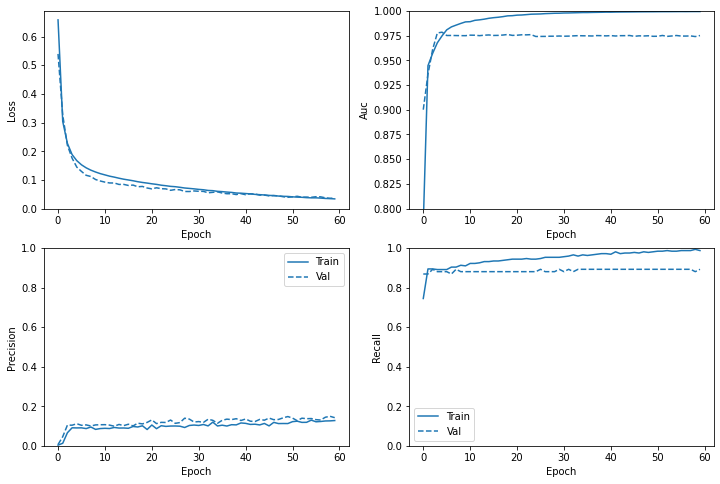

In [48]:
plot_metrics(pond_history)

Observa-se pelo gráfico da função de custo que está ocorrendo "overfitting".

## Avaliação das métricas

In [49]:
train_pred_pond = rna_pond.predict(train_features, batch_size=BATCH_SIZE)
test_pred_pond = rna_pond.predict(test_features, batch_size=BATCH_SIZE)

In [51]:
print('Número de exemplos positivos do conjunto de teste =', len(test_labels[test_labels>
0.9]))
pond_results = rna_pond.evaluate(test_features, test_labels,
batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(rna_pond.metrics_names, pond_results):
    print(name, ': ', value)
print()

Número de exemplos positivos do conjunto de teste = 85
loss :  0.03754543140530586
tp :  74.0
fp :  484.0
tn :  42152.0
fn :  11.0
accuracy :  0.9884132146835327
precision :  0.13261649012565613
recall :  0.8705882430076599
auc :  0.9634807705879211



## Cálculo da Pontuação F1

In [52]:
precision = pond_results[5]
recall = pond_results[6]
F1_pond = 2*precision*recall/(precision + recall)
print('Pontuação F1 = ', F1_pond)

Pontuação F1 =  0.2338562319317987


## Matriz de confusão

Podemos usar a matriz de confusão para visualizar melhor as classes reais e previstas.

Matriz de confusão:
 [[42152   484]
 [   11    74]]


<ipython-input-53-7fb500039f5a>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-53-7fb500039f5a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


<Figure size 432x432 with 0 Axes>

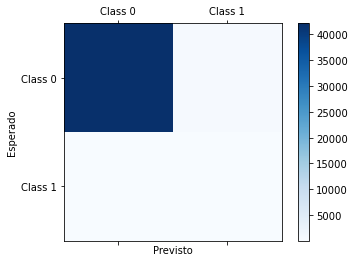

In [53]:
conf_mat = confusion_matrix(y_true=test_labels, y_pred=np.round(test_pred_pond))
print('Matriz de confusão:\n', conf_mat)
labels = ['Class 0', 'Class 1']
plt.figure(figsize=(6,6))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Previsto')
plt.ylabel('Esperado')
plt.show()

## Gráfico do ROC

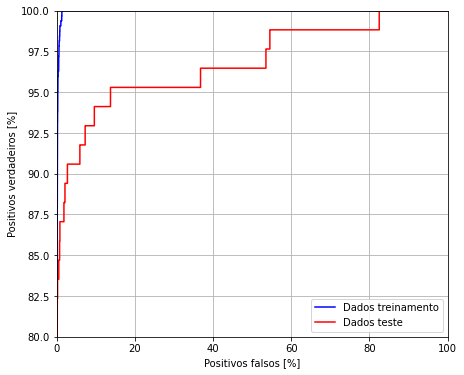

In [54]:
fp_train, tp_train, _ = sklearn.metrics.roc_curve(train_labels, train_pred_pond)
fp_test, tp_test, _ = sklearn.metrics.roc_curve(test_labels, test_pred_pond)
plt.figure(figsize=(7, 6))
plt.plot(100*fp_train, 100*tp_train, 'b', label='Dados treinamento')
plt.plot(100*fp_test, 100*tp_test, 'r', label='Dados teste')
plt.xlabel('Positivos falsos [%]')
plt.ylabel('Positivos verdadeiros [%]')
plt.xlim([0,100])
plt.ylim([80,100])
plt.grid(True)
ax = plt.gca()
plt.legend(loc='lower right')
plt.show()

## 7. Conclusão

A classificação de dados com número de exemplos desequilibrado é uma tarefa inerentemente difícil, pois podem existir poucos exemplos para o treinamento. Assim, deve-se sempre começar usando os dados originais e fazer o possível para coletar o maior número possível de exemplos e analisar quais recursos podem ser relevantes para que o modelo possa obter o máximo da sua classe minoritária. Em algum ponto, o modelo pode ter dificuldades para melhorar e produzir os resultados desejados, portanto, é importante ter em mente o contexto do problema e o compromisso entre os diferentes tipos de erros.